# NICO2AI  第3回 線形回帰 (7/1) 実践演習

## 実践演習の進め方
1. 講師が題材及びコードの説明をします
2. "WRITE ME!"の部分のコードを書いてみましょう
3. 書き始める前に必要な処理の概略を頭の中やノートに浮かべてからコードに落とし込みましょう

In [122]:
# 今日使うパッケージのインポート
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import LogNorm
from sklearn import datasets

# デフォルトのスタイルシートの変更
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'
plt.rcParams['font.size'] = 15

# 日本語文字化け対策
fontnames = [os.path.basename(fm.FontProperties(fname=f).get_name()) for f in fm.findSystemFonts()]
selected = list(filter(lambda x: 'IPAGothic' in x or 'TakaoGothic' in x or 'Osaka' in x, fontnames))

if len(selected) == 0:
    print('ERROR! Install Japanese font beforehand')
else:
    plt.rcParams['font.family'] = selected[0]

## 課題1. 1次元データに対する線形回帰
今回は、非常に単純な
$$
y = 0.5x + 0.2 + \epsilon
$$
というデータ生成分布にしたがって生成されたデータ点から、真のパラメータ傾き0.5とバイアス0.2を線形回帰で予測してみましょう。基底関数としては、データ生成分布と同じく、
$$
y = ax + b
$$
という傾きとバイアスを持つモデルを使います。

プログラムの流れは次のようになります：

* 訓練データ点$({\bf x}, {\bf t})$の生成
* バイアス項 (常に係数が1) を列として加えた行列${\bf X}$の作成
* 解析解 ${\bf \theta}_{LS} = ({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf t}$ の計算
* 予測${\bf y} = {\bf X \theta}$の計算
* データ点の描画
* データ生成関数及び予測関数の描画

**課題：**  
WRITE ME!の部分を埋めて、線形回帰を行うプログラムを完成させよ。

### データの観察

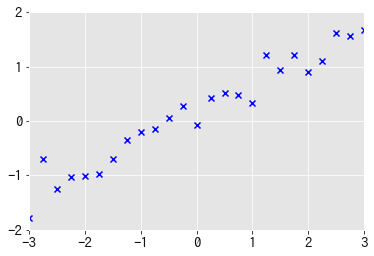

In [36]:
rnd = np.random.RandomState(1701)

n_train = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, n_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

plt.figure()
plt.scatter(train_x, train_y, marker="x", color="b", label="Training points")  # ラベルをつける
plt.xlim(-3, 3)  # xlim(最小値、最大値)
plt.ylim(-2, 2)  # ylim(最小値、最大値)
plt.show()

### 学習コードの実装

[ 0.5164847  0.1650716]


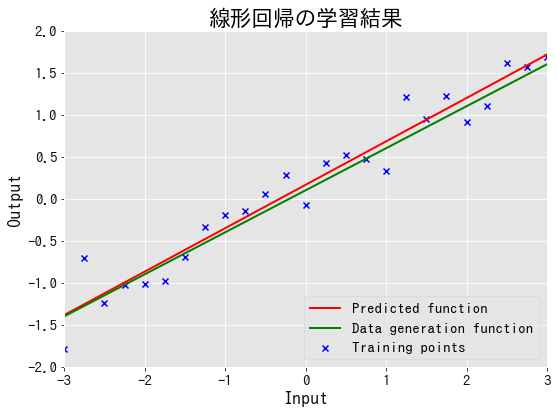

In [40]:
# WRITE ME!
# X = (train_xにバイアス項1の列ベクトルを追加)

# theta = (X^T X)^{-1} X^T y (方程式を解く)
print(theta)

# pred_y = (学習したθを用いて訓練データに対する予測を計算)

# データの生成分布のプロット
real_y = 0.5 * train_x + 0.1

# 学習結果の描画
plt.figure(figsize=(8, 6))
plt.title("線形回帰の学習結果")  # タイトル
plt.plot(train_x, pred_y, color="r", label="Predicted function", linewidth=2)  # ラベルをつける
plt.plot(train_x, real_y, color="g", label="Data generation function", linewidth=2)  # ラベルをつける
plt.scatter(train_x, train_y, marker="x", color="b", label="Training points")  # ラベルをつける
plt.xlim(-3, 3)  # xlim(最小値、最大値)
plt.ylim(-2, 2)  # ylim(最小値、最大値)
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.show()

### 補助課題：多項式回帰
上の問題と同じく線形回帰を扱いますが、今度はモデル化の方法が少し異なります：
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_k x^k$$

今回は、sin関数を近似するために基底関数に多項式を入れました。

**課題：**
* 課題1と同様の手順に基づき、sin関数から生成されたデータに関して多項式回帰を実装・実行せよ。
* 多項式の次元数n_dimsを調整して、挙動の変化を観察せよ。
* n_dimsを増やした場合、過学習が発生し、各θの値が非常に大きくなってしまう。L2正則化を実装せよ。
* 正則化係数λを調整して、挙動の変化を観察せよ。

#### ヒント：
正則化係数をλとした時、正則化係数を考慮した二乗誤差最小化の解は、Iを単位行列として
$$
{\bf \theta}_{LS} = ({\bf X}^T {\bf X} + \lambda I)^{-1} {\bf X}^T {\bf t}
$$
で表される。

#### ヒント2：
$$
X = \left(
    \begin{array}{ccccc}
      1 & x_1 & x_1^2 \cdots & x_1^k  \\
      1 & x_2 & x_2^2 \cdots & x_2^k \\
      \vdots & \vdots & \ddots & \vdots \\
      1 & x_m & x_m^2 \cdots & x_m^k \\
    \end{array}
  \right)
$$

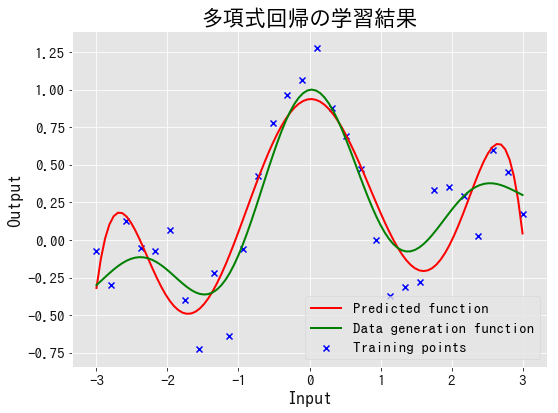

In [31]:
rnd = np.random.RandomState(1301)

n_train = 30  # 訓練データ数
n_dims = 7  # 次元数
lmbda = 0.0  # 正則化係数 (lambdaは予約語なのでスペルをわざと違えている)
    
# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, n_train)
piX = np.pi * train_x
train_y = np.sin(piX)/(piX)+0.1*train_x+0.2*rnd.randn(len(train_x))


# WRITE ME!
# X = (基底関数を並べる)

theta = np.linalg.solve(np.dot(X.T, X) + lmbda * np.eye(X.shape[1]), np.dot(X.T, train_y))
# theta = (X^T X + \lmbda I)^{-1} X^T y (方程式を解く)

# 予測と元分布を比較
plot_x = np.linspace(-3, 3, 100)
piX = np.pi * plot_x
real_y = np.sin(piX)/(piX)+0.1*plot_x
plot_X = np.stack([plot_x ** p for p in range(n_dims)], axis=1)
pred_y = np.dot(plot_X, theta)

# 学習結果の描画
plt.figure(figsize=(8, 6))
plt.title("多項式回帰の学習結果")  # タイトル
plt.plot(plot_x, pred_y, color="r", label="Predicted function", linewidth=2)  # ラベルをつける
plt.plot(plot_x, real_y, color="g", label="Data generation function", linewidth=2)  # ラベルをつける
plt.scatter(train_x, train_y, marker="x", color="b", label="Training points")  # ラベルをつける
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.show()

## 課題2. The Allen Mouse Brain Connectivity Atlasの結合成分の算出
講義解説の通り、The Allen Mouse Brain Connectivity Atlasでは、注入部(injection)と射影部(projection)の体積を計算し、ある領野からどの領野に注入した蛍光成分が移動したかに基づいて領野間の結合の強さを測定している。

* $x_{ij}$：実験$i$の領野$j$に対する注入量
* $y_{ik}$：実験$i$の領野$k$における射影量
* $w_{jk}$：領野$j$から領野$k$に対する結合強度

としたとき、注入量・射影量から領野$k$にprojectionする結合強度を計算する方法として、
$$
L = \min_{w_{jk} \ge 0} \sum_{i=1}^{N_i} ( \sum_{j=1}^{N_j} w_{jk} x_{ij} - y_{ik} )^2
$$
を最小化する**非負制約**線形回帰問題を考えることができる (Natureの実際の論文では非負制約ロバスト回帰を行っているが、講義の範囲を超えるので扱わない)。

重み制約付き線形回帰問題は解析的には解けないため、今回はscipy.optimize.nnls (non-negative least squares solver)を用いる。nnls(A, b)は方程式$Aw=b$の非負制約付きの解を返す。

**課題：**  
* WRITE ME!を指示にしたがって埋め、このデータに対して非負制約線形回帰を行い、領野間の結合を推定せよ。
* 推定した重みをnature13186-s4.xlsxと比較せよ。

### データ解説：
今回用いるデータ (data/VIS_s3.csv) には、実験データのうち、primary_injection_structure (主要注入部位)を視覚系 (VISxx) に絞った結果が含まれている。各行は以下のようなデータからなる：
* 1行目：注入部の列名(〜24列目)
* 2行目：射影部の領野名 (acronym) (25列目〜)
* 3行目：射影部の各領野について、左右半球のどちらにあるか (hemisphere) (25列目〜)
* 4行目〜：実験条件と結果 (1行1実験) 左から順に、実験ID、総注入量、主要注入部位、部位ID、注入量、(以下、2番目〜最大6番目までの注入部位、部位ID注入量が繰り返される、存在しない場合は空白)、各射影部位への射影量

### 前処理
まず、上記の線形回帰問題を解くためには、注入部位の名前の一覧と、それらが重み行列のどの列に対応するかを決めなければなりません。そこでまず前処理として、入力領域名 (area_names)の一覧をcsvより取得します。

In [155]:
import scipy

area_names = []
target_names = []
with open("data/VIS_s3.csv") as f:
    for idx, line in enumerate(f):
        line = line.strip("\n")
        if idx == 1:
            target_names = line.split(",")[24:]
        elif idx == 2:
            # 左右半球を見分けるために単純に「部位名」+「L/R」として連結
            target_names = list(map(lambda a, b: a + b, target_names, line.split(",")[24:]))
        elif idx < 3:
            continue
        strs = line.split(",")
        
        # WRITE ME!
        # 各行について、記載されている領野名 (最大6つ) をarea_namesに追加 (空文字は追加しないこと)
        pass

unique_area_names = np.unique(area_names)
atoi = dict(zip(unique_area_names, range(len(unique_area_names))))
n_dims = len(unique_area_names)
print(atoi)  # 領野名から列インデックスへ変換する辞書
print(target_names)  # 射影先の領野名一覧

{'AUDd': 0, 'VISpl': 22, 'SUB': 14, 'CA1': 2, 'VISpm': 23, 'ENTm': 6, 'RSPagl': 10, 'VISa': 16, 'ENTl': 5, 'VISrl': 25, 'PERI': 7, 'ECT': 4, 'DG': 3, 'VISl': 19, 'VISp': 21, 'POST': 8, 'VISpor': 24, 'RSPd': 11, 'VISli': 20, 'TEa': 15, 'SSp-bfd': 13, 'VISal': 17, 'PRE': 9, 'AUDpo': 1, 'RSPv': 12, 'VISam': 18}
['VISpm2/3R', 'VISl6aR', 'VISl6bR', 'VISal5R', 'VISpm6aR', 'VISpl2/3R', 'VISam1R', 'VISp6bR', 'VISpl6aR', 'VISpR', 'VISpl6bR', 'VISamR', 'VISam4R', 'VISalR', 'VISlR', 'VISrlR', 'VISl1R', 'VISplR', 'VISam5R', 'VISam6bR', 'VISpm6bR', 'VISpm4R', 'VISpmR', 'VISpm5R', 'VISl4R', 'VISp1R', 'VISal6aR', 'VISl5R', 'VISal6bR', 'VISp4R', 'VISpl1R', 'VISp5R', 'VISpm1R', 'VISp2/3R', 'VISpl4R', 'VISpl5R', 'VISal2/3R', 'VISl2/3R', 'VISam6aR', 'VISam2/3R', 'VISal1R', 'VISal4R', 'VISli1R', 'VISli6aR', 'VISli6bR', 'VISaR', 'VISa1R', 'VISa2/3R', 'VISa4R', 'VISa5R', 'VISa6aR', 'VISa6bR', 'VISliR', 'VISli2/3R', 'VISli4R', 'VISli5R', 'VISrl1R', 'VISrl2/3R', 'VISrl4R', 'VISrl5R', 'VISrl6aR', 'VISrl6bR', '

### 線形回帰の実行
各射影先$y_k (k=1, 2,...)$について、個別に線形回帰問題をときます。そのために、各行に1実験ごとのinjection量が入った行列$X$と、各行に1実験ごとのprojection量が入った行列$y$が必要になります。また、

In [163]:
X = []
Y = []
with open("data/VIS_s3.csv") as f:
    for idx, line in enumerate(f):
        line = line.strip("\n")
        if idx == 0:
            col_names = line.split(",")[:24]
        elif idx == 1:
            projection_names = line.split(",")[24:]
        elif idx == 2:
            projection_lr = line.split(",")[24:]
            projection_names = list(map(lambda a,b: a + b, projection_names, projection_lr))
            target_idx = projection_names.index(target_name + target_lr)
            if target_idx != -1:
                print("Target found: {}".format(target_idx))
            else:
                print("Target not found...")
                assert(False)
        else:
            injection = [0.0 for _ in range(n_dims)]
            strs = line.split(",")
            
            # WRITE ME!
            # 各行から注入量を持ってくる
            pass
        
            X.append(injection)
            Y.append(list(map(float, strs[24:])))

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
weights = np.zeros((X.shape[1], Y.shape[1]))
total_error = 0
for cls in range(Y.shape[1]):
    # WRITE ME!
    # nnlsを使って、あるprojectionに対する線形回帰の結果としてtheta, errorを得る
    pass
    
    weights[:, cls] = theta
    total_error += error
print("予測誤差: {}".format(total_error))
np.set_printoptions(precision=3)
print(weights)
print("最大値：{}、最小値：{}、平均値：{}、ゼロ値：{}/{}".format(weights.max(), weights.min(), np.mean(weights), np.sum(weights == 0), weights.size))

Target found: 17
(366, 26)
(366, 139)
予測誤差: 483.97839733136215
[[ 4.408  3.942  0.602 ...,  0.     0.034  0.059]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 ..., 
 [ 1.847  0.368  0.066 ...,  0.384  0.365  0.061]
 [ 0.253  0.723  0.12  ...,  0.355  0.36   0.06 ]
 [ 0.191  0.069  0.02  ...,  0.255  0.093  0.014]]
最大値：412.9639660296161、最小値：0.0、平均値：1.7210449623787996、ゼロ値：1769/3614


### 結果の可視化

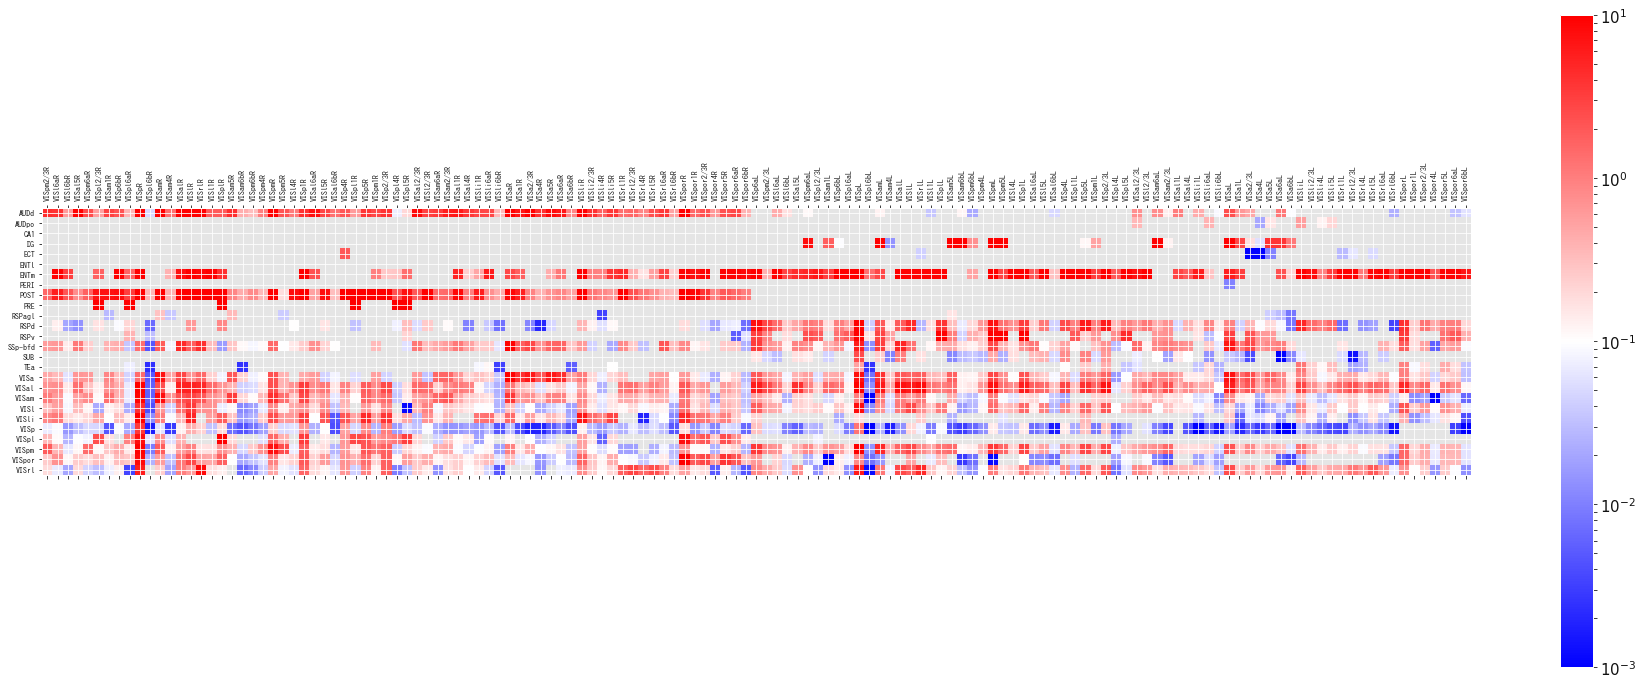

In [164]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(32, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(weights, cmap="bwr", norm=LogNorm(vmin=0.001, vmax=10))
ax.set_xticks(range(weights.shape[1]))
ax.set_xticklabels(projection_names, rotation='vertical', fontsize=8)
ax.set_yticks(range(weights.shape[0]))
ax.set_yticklabels(unique_area_names, fontsize=8)
plt.colorbar(cax)
plt.show()